In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
data_path = './CTU-13_data'

data_file_names = [file for file in os.listdir(data_path)] # Lectura de los nombres de los archivos del directorio
print(data_file_names)  # Lista de strings que contiene el nombre de los archivos .parquet


['1-Neris-20110810.binetflow.parquet', '10-Rbot-20110818.binetflow.parquet', '11-Rbot-20110818-2.binetflow.parquet', '12-NsisAy-20110819.binetflow.parquet', '13-Virut-20110815-3.binetflow.parquet', '2-Neris-20110811.binetflow.parquet', '3-Rbot-20110812.binetflow.parquet', '4-Rbot-20110815.binetflow.parquet', '5-Virut-20110815-2.binetflow.parquet', '6-Menti-20110816.binetflow.parquet', '7-Sogou-20110816-2.binetflow.parquet', '8-Murlo-20110816-3.binetflow.parquet', '9-Neris-20110817.binetflow.parquet']


In [ ]:
# Diccionario que contendra los dataframes despues de hacer el cast de parquet a pandas df
data_frames = {}
'''
Iteramos sobre la lista de nombres para añadirlos al diccionario de dataframes

Ejemplo del formato del diccionario seria: 

    {'1-Neris-20110810.binetflow.parquet': pd.DataFrame('./CTU-13_data/1-Neris-20110810.binetflow.parquet')}

'''
for file in data_file_names:
    data_frames[file] = pd.read_parquet(f'{data_path}/{file}') 

In [59]:
# Visualizamos los primeros 5 registros de los datasets
for file in data_file_names:
    print(file)
    print(data_frames.get(f'{file}').head())

1-Neris-20110810.binetflow.parquet
        dur proto    dir state  stos  dtos  tot_pkts  tot_bytes  src_bytes  \
0  1.026539   tcp     ->  S_RA   0.0   0.0         4        276        156   
1  1.009595   tcp     ->  S_RA   0.0   0.0         4        276        156   
2  3.056586   tcp     ->  SR_A   0.0   0.0         3        182        122   
3  3.111769   tcp     ->  SR_A   0.0   0.0         3        182        122   
4  3.083411   tcp     ->  SR_A   0.0   0.0         3        182        122   

                                    label                  Family  
0  flow=Background-Established-cmpgw-CVUT  20110810.binetflow.csv  
1  flow=Background-Established-cmpgw-CVUT  20110810.binetflow.csv  
2             flow=Background-TCP-Attempt  20110810.binetflow.csv  
3             flow=Background-TCP-Attempt  20110810.binetflow.csv  
4             flow=Background-TCP-Attempt  20110810.binetflow.csv  
10-Rbot-20110818.binetflow.parquet
          dur proto    dir    state  stos  dtos  tot_

### Las columnas en los datasets de CTU-13 están relacionadas con el tráfico de red y suelen incluir información sobre conexiones entre IPs, duración, puertos, bytes transferidos, protocolos, etiquetas de botnet, entre otras.

#### - **dur:** Duración de la conexión en segundos.
#### - **proto:** Protocolo de comunicación utilizado (ej. TCP, UDP, ICMP).
#### - **dir:** Dirección del flujo de tráfico (ej. → si es de origen a destino, o ← si es de destino a origen).
#### - **state:** Estado de la conexión (ej. CON para conexiones establecidas, INT para interrumpidas).
#### - **stos / dtos:** Tipo de servicio (ToS) del tráfico enviado y recibido. Son valores que indican la prioridad del paquete en la red.
#### - **tot_pkts:** Número total de paquetes enviados en la conexión.
#### - **tot_bytes:** Número total de bytes transferidos.
#### - **src_bytes:** Cantidad de bytes enviados desde la IP de origen.
#### - **label:** Etiqueta que indica si el tráfico es normal o pertenece a una botnet (tráfico malicioso).
#### - **Family:** Especie de botnet detectada (ej. Neris, Rbot, Virut, Murlo, etc.).

In [60]:
for file in data_file_names:
    print(f"Columnas de {file}:")
    print(data_frames[file].columns)
    print("\n")


Columnas de 1-Neris-20110810.binetflow.parquet:
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label', 'Family'],
      dtype='object')


Columnas de 10-Rbot-20110818.binetflow.parquet:
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label', 'Family'],
      dtype='object')


Columnas de 11-Rbot-20110818-2.binetflow.parquet:
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label', 'Family'],
      dtype='object')


Columnas de 12-NsisAy-20110819.binetflow.parquet:
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label', 'Family'],
      dtype='object')


Columnas de 13-Virut-20110815-3.binetflow.parquet:
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label', 'Family'],
      dtype='object')


Columnas de 2-Neris-20110811.bine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621173 entries, 0 to 1621172
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   dur        1621173 non-null  float32 
 1   proto      1621173 non-null  category
 2   dir        1621173 non-null  category
 3   state      1621172 non-null  category
 4   stos       1616028 non-null  float32 
 5   dtos       1529939 non-null  float32 
 6   tot_pkts   1621173 non-null  int32   
 7   tot_bytes  1621173 non-null  int64   
 8   src_bytes  1621173 non-null  int64   
 9   label      1621173 non-null  category
 10  Family     1621173 non-null  category
dtypes: category(5), float32(3), int32(1), int64(2)
memory usage: 58.8 MB
None
                dur          stos          dtos      tot_pkts     tot_bytes  \
count  1.621173e+06  1.616028e+06  1.529939e+06  1.621173e+06  1.621173e+06   
mean   7.506620e+02  4.787046e-03  7.614683e-04  4.293056e+01  3.345778e+04   
std    1.218

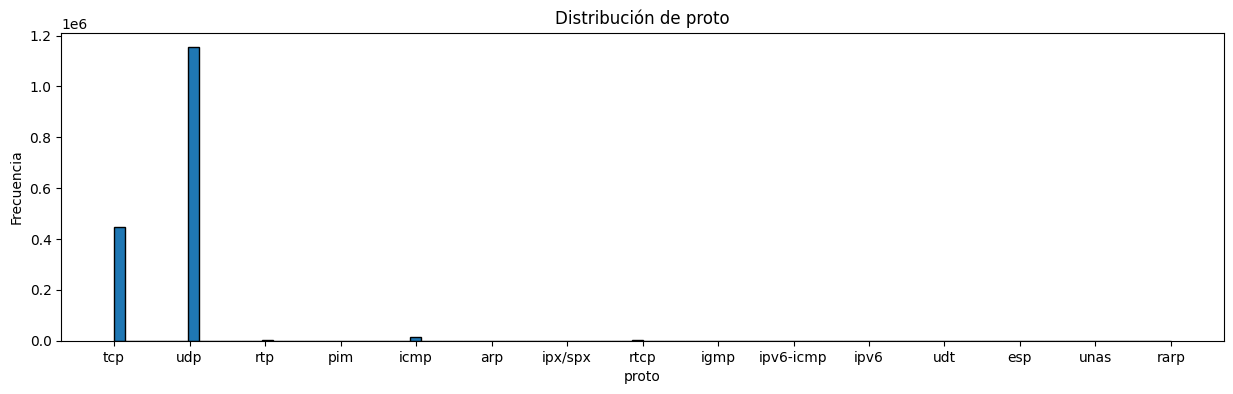

In [67]:

sample_file = data_file_names[0]  # Puedes cambiar el indice para revisar otros archivos
df_sample = data_frames[sample_file]

# Mostrar nombres de columnas y tipos de datos
print(df_sample.info())

# Mostrar estadisticas generales
print(df_sample.describe())

column_to_plot = df_sample.columns[1] 
plt.figure(figsize=(15,4))
plt.hist(df_sample[column_to_plot], bins=100, edgecolor='black')
plt.xlabel(column_to_plot)
plt.ylabel('Frecuencia')
plt.title(f'Distribución de {column_to_plot}')
plt.show()
